<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/HW03_Trzeciak_Piotr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework nr 3

1.   What does 'good treshold' actually mean?
2.   Calculating optimal treshold with python, using AUC metric.


# 1. WHat does it mean to have good treshold?

Short anwser: Usually when we think about evaluating our model we use on of several metrics like: accuracy, precision, recall, specificity, f1 score. When we think abouth treshold's one may think that we should always aim for best accuracy of the model - the more accurate guesses - the better. But it's frequently not the case and it depends of the context. Let's see 3 examples:

1. Patients with cancer.
2. Fraud detection.
3. Recommendation system (like Allegro) but this time with both: users that want best recomendations AND owners of products who pay for their products to be recommended to users.

In first example we focus on patients with cancer. Telling a healthy patient that he's got cancer (false positive) is less harmfull than telling a patient with a cancer that he's healthy. So in this situation we should focus on SPECIFICITY (or PRECISION).

In second missdiagnosing could lead to huge finantial loss. We focus on RECALL.

In last example we should consider both - pushing 'good' items and those patrons paid us to push. Here we could use $F_{beta}$ score that combines those two needs in specific proportion.

# 2. Calculating optimal treshold with python.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score

# Data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

In [24]:
thresholds = np.arange(0, 1, 0.05)
results_s = []
results_auc = []

for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)

    # For SPECIFICITY
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tnr = tn / (tn + fp)

    # For ROC curves
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    results_s.append({'threshold': thresh, 'tnr': tnr})
    results_auc.append({'threshold': thresh, 'fpr': fpr[1], 'tpr': tpr[1], 'auc': auc})

tnr_df = pd.DataFrame(results_s)
auc_df = pd.DataFrame(results_auc)

In [75]:
merged_df = pd.merge(tnr_df, auc_df[['threshold', 'auc']], on='threshold')
print(merged_df)

    threshold       tnr       auc
0        0.00  0.000000  0.500000
1        0.05  0.888889  0.944444
2        0.10  0.925926  0.951727
3        0.15  0.925926  0.951727
4        0.20  0.925926  0.951727
5        0.25  0.925926  0.951727
6        0.30  0.925926  0.951727
7        0.35  0.925926  0.951727
8        0.40  0.925926  0.951727
9        0.45  0.925926  0.951727
10       0.50  0.944444  0.960986
11       0.55  0.962963  0.970246
12       0.60  0.962963  0.970246
13       0.65  0.962963  0.970246
14       0.70  0.981481  0.973887
15       0.75  0.981481  0.973887
16       0.80  1.000000  0.977528
17       0.85  1.000000  0.966292
18       0.90  1.000000  0.938202
19       0.95  1.000000  0.910112


As we can see, using treshold = 0.5 is NOT the best when we want to have high SPECIFICITY. Here we got 100% TNR when aplying 0.8, but it doesn't need to hold with bigger datasets. The most important case is minimizing the number of ill patients who are told they are healthy!

Let's compare AUC metrics with TNR to find and find the optial treshold.

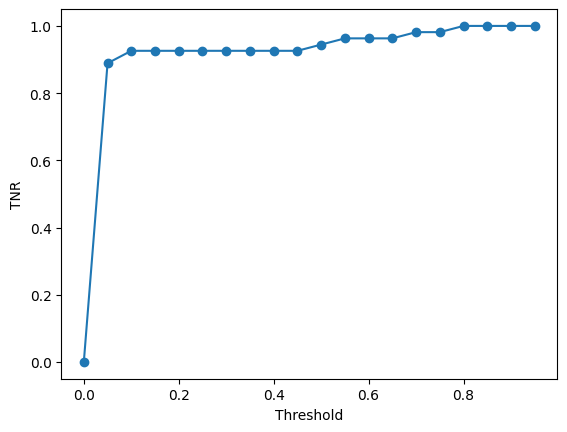

In [103]:
fig, ax = plt.subplots()
ax.plot(merged_df['threshold'], merged_df['tnr'], marker='o')
ax.set_xlabel('Threshold')
ax.set_ylabel('TNR')
plt.show()

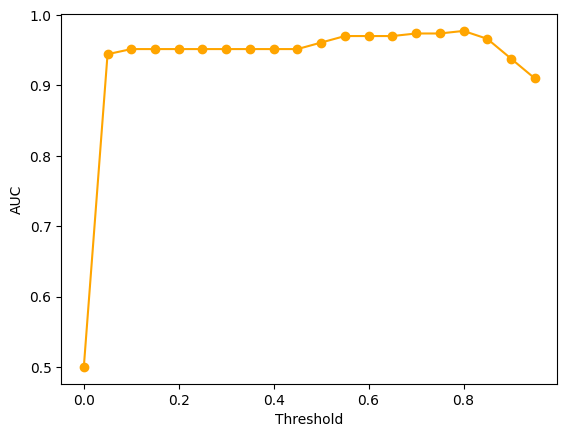

In [105]:
fig, ax = plt.subplots()
ax.plot(merged_df['threshold'], merged_df['auc'], marker='o', c='orange')
ax.set_xlabel('Threshold')
ax.set_ylabel('AUC')
plt.show()

In [70]:
treshold_fit = auc_df.loc[auc_df['auc'].idxmax(), ['threshold', 'auc']]
treshold_fit
print(f"Best threshold for maximising AUC  = {treshold_fit.iloc[0]}\nThe biggest AUC for this threshold = {round(treshold_fit.iloc[1], 4)}")

Best threshold for maximising AUC  = 0.8
The biggest AUC for this threshold = 0.9775


# Anwser to (2)
So via AUC metric - the optimal value of treshold is 0.8. Not the classical 0.5.
Note: We should always consider what is our goal and chose these hyper-params accordingly.


